In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import seaborn as sns
import math as math
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

 Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.
 Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime.
 

In [2]:
# let's do thsi one 
#https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model
#with random forest

# loand data
data_url = '..\..\datasets\BlackFriday.csv'
data=pd.read_csv(data_url)

data.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
#
desc = data.describe(include='all').T

In [4]:
print(desc)

                             count unique        top    freq         mean  \
User_ID                     537577    NaN        NaN     NaN  1.00299e+06   
Product_ID                  537577   3623  P00265242    1858          NaN   
Gender                      537577      2          M  405380          NaN   
Age                         537577      7      26-35  214690          NaN   
Occupation                  537577    NaN        NaN     NaN      8.08271   
City_Category               537577      3          B  226493          NaN   
Stay_In_Current_City_Years  537577      5          1  189192          NaN   
Marital_Status              537577    NaN        NaN     NaN     0.408797   
Product_Category_1          537577    NaN        NaN     NaN      5.29555   
Product_Category_2          370591    NaN        NaN     NaN      9.84214   
Product_Category_3          164278    NaN        NaN     NaN      12.6698   
Purchase                    537577    NaN        NaN     NaN      9333.86   

In [5]:
profile = pandas_profiling.ProfileReport(data)

In [6]:
profile.to_file(outputfile="BlackFriday.html")

In [5]:
categorical = data.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())
    

Product_ID
3623
Gender
2
Age
7
City_Category
3
Stay_In_Current_City_Years
5


In [6]:
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [7]:
corrmat = data.corr()

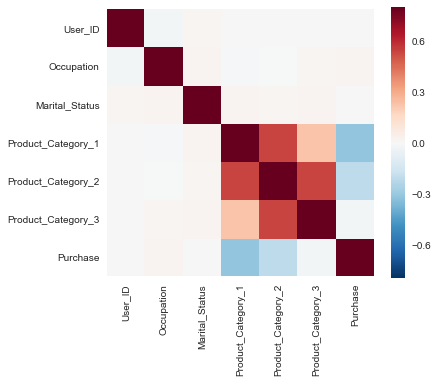

In [8]:
plt.figure(figsize=(6, 5))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [9]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [10]:
X=data.drop(['User_ID','Product_ID'],axis=1)

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 41.0+ MB


In [12]:
X.dropna(inplace=True)
X.head(10)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,F,51-55,9,A,1,0,2,3.0,4.0,13055
18,M,36-45,1,B,1,1,1,14.0,16.0,11788
19,M,26-35,12,C,4+,1,1,5.0,15.0,19614
24,M,26-35,12,C,4+,1,1,8.0,14.0,11927
28,M,26-35,17,C,0,0,5,8.0,14.0,5391
29,F,36-45,1,B,4+,1,2,4.0,8.0,16352


In [13]:
X['p2']=X['Product_Category_2'].astype(np.int64) 
X['p3']=X['Product_Category_3'].astype(np.int64) 
X['YearsResidenceHere']=X['Stay_In_Current_City_Years'].apply(lambda x: '4' if x == '4+' else x).astype(np.int64)



In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164278 entries, 1 to 537573
Data columns (total 13 columns):
Gender                        164278 non-null object
Age                           164278 non-null object
Occupation                    164278 non-null int64
City_Category                 164278 non-null object
Stay_In_Current_City_Years    164278 non-null object
Marital_Status                164278 non-null int64
Product_Category_1            164278 non-null int64
Product_Category_2            164278 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      164278 non-null int64
p2                            164278 non-null int64
p3                            164278 non-null int64
YearsResidenceHere            164278 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 17.5+ MB


In [15]:
# STILL NEED ENCODING 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
#-----------------------------
cCat=X['City_Category']
cEncoder = LabelEncoder()
cityEncoded = cEncoder.fit_transform(cCat).astype(np.int64)
X['cityEncoded']=cityEncoded
#-----------------------------
gend=X['Gender']
gEncoder = LabelEncoder()
gendEncoded = gEncoder.fit_transform(gend)
X['gendEncoded']=gendEncoded.astype(np.int64)


In [16]:
lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(X["Age"])
ageT=pd.DataFrame(lb_results, columns=lb_style.classes_)

In [17]:
ageT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164278 entries, 0 to 164277
Data columns (total 7 columns):
0-17     164278 non-null int32
18-25    164278 non-null int32
26-35    164278 non-null int32
36-45    164278 non-null int32
46-50    164278 non-null int32
51-55    164278 non-null int32
55+      164278 non-null int32
dtypes: int32(7)
memory usage: 4.4 MB


In [18]:

xt=pd.concat([X, ageT], axis=1)
xt.dropna(inplace=True)
xt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50232 entries, 1 to 164277
Data columns (total 22 columns):
Gender                        50232 non-null object
Age                           50232 non-null object
Occupation                    50232 non-null float64
City_Category                 50232 non-null object
Stay_In_Current_City_Years    50232 non-null object
Marital_Status                50232 non-null float64
Product_Category_1            50232 non-null float64
Product_Category_2            50232 non-null float64
Product_Category_3            50232 non-null float64
Purchase                      50232 non-null float64
p2                            50232 non-null float64
p3                            50232 non-null float64
YearsResidenceHere            50232 non-null float64
cityEncoded                   50232 non-null float64
gendEncoded                   50232 non-null float64
0-17                          50232 non-null float64
18-25                         50232 non-null f

In [19]:

Xr=xt.drop(['Age','Product_Category_2','Product_Category_3','Purchase','Stay_In_Current_City_Years','City_Category','Gender'],axis=1)
Y=xt['Purchase']

Xr.head(22)

,Occupation,Marital_Status,Product_Category_1,p2,p3,YearsResidenceHere,cityEncoded,gendEncoded,0-17,18-25,26-35,36-45,46-50,51-55,55+
1,10.0,0.0,1.0,6.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,7.0,1.0,1.0,8.0,17.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13,20.0,1.0,1.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14,9.0,0.0,5.0,8.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16,9.0,0.0,2.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18,1.0,1.0,1.0,14.0,16.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19,12.0,1.0,1.0,5.0,15.0,4.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24,12.0,1.0,1.0,8.0,14.0,4.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
28,17.0,0.0,5.0,8.0,14.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29,1.0,1.0,2.0,4.0,8.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
Xr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50232 entries, 1 to 164277
Data columns (total 15 columns):
Occupation            50232 non-null float64
Marital_Status        50232 non-null float64
Product_Category_1    50232 non-null float64
p2                    50232 non-null float64
p3                    50232 non-null float64
YearsResidenceHere    50232 non-null float64
cityEncoded           50232 non-null float64
gendEncoded           50232 non-null float64
0-17                  50232 non-null float64
18-25                 50232 non-null float64
26-35                 50232 non-null float64
36-45                 50232 non-null float64
46-50                 50232 non-null float64
51-55                 50232 non-null float64
55+                   50232 non-null float64
dtypes: float64(15)
memory usage: 6.1 MB



# Decigion tree

In [21]:
from sklearn import tree
# A convenience for displaying visualizations.
from IPython.display import Image

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=5,
    random_state = 50
)
decision_tree.fit(Xr, Y)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=50, splitter='best')

In [22]:
# Render our tree.
import pydotplus
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=Xr.columns,
    class_names=None,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
graph.write_pdf("purchase_decigion_tree.pdf")

True

In [23]:
 # evaluate the result: what is the distribution for Y
Y.value_counts()
# 
#


15426.0    24
15282.0    23
15866.0    23
15523.0    23
15547.0    22
15283.0    22
15202.0    21
15423.0    21
11819.0    21
15459.0    21
15583.0    21
15905.0    21
15161.0    21
15879.0    21
15705.0    20
15499.0    20
15556.0    20
15734.0    20
15684.0    20
15361.0    20
15627.0    20
11717.0    20
15917.0    19
11406.0    19
15216.0    19
11386.0    19
15755.0    19
15486.0    19
15662.0    19
15878.0    19
           ..
10912.0     1
19945.0     1
13180.0     1
3235.0      1
12891.0     1
15977.0     1
6419.0      1
6127.0      1
16551.0     1
16049.0     1
589.0       1
19925.0     1
23358.0     1
13464.0     1
3381.0      1
10634.0     1
2696.0      1
4642.0      1
20597.0     1
6789.0      1
8453.0      1
3697.0      1
10788.0     1
6157.0      1
19931.0     1
23598.0     1
4507.0      1
12542.0     1
1406.0      1
1768.0      1
Name: Purchase, Length: 11106, dtype: int64

In [24]:
#  loan status already dropped from the data

X_train, X_valid, y_train, y_valid = train_test_split(Xr, Y, test_size=0.2, random_state=10)
X_train.head(5)

,Occupation,Marital_Status,Product_Category_1,p2,p3,YearsResidenceHere,cityEncoded,gendEncoded,0-17,18-25,26-35,36-45,46-50,51-55,55+
114940,2.0,1.0,1.0,8.0,17.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
143598,4.0,0.0,5.0,11.0,15.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
135038,12.0,0.0,1.0,6.0,8.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
104107,3.0,0.0,1.0,14.0,16.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
64339,14.0,1.0,11.0,13.0,16.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
rfc = ensemble.RandomForestClassifier( max_depth =5, random_state = 42, criterion='entropy')
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfc.get_params())



Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [26]:
rfc.fit(X_train, y_train)

C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [27]:
y_pred = rfc.predict(X_valid)
f1_scr = f1_score(y_pred, y_valid, average='micro')
print("f1 score ", f1_scr)

f1 score  9.95321986663e-05


In [28]:

cvs=cross_val_score(rfc, Xr, Y, cv=10)
print("cross_validation " + str(cvs) ) 

C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


cross_validation [ 0.00057556  0.00054543  0.0008394   0.00071441  0.00067385  0.00085349
  0.00142399  0.00044563  0.00113572  0.        ]
